In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
# define the function
def my_function(x):
  return 1/(1+100*(x-0.5)**2) # Runge funtion
def my_function1(x):
  return abs(x-0.5)

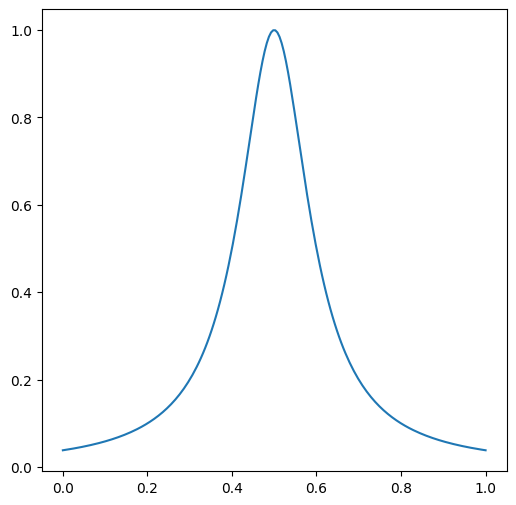

In [21]:
# define evaluation points and plot the function
x = linspace(0,1,200)
plot(x,my_function(x))

Text(0.5, 1.0, 'Interpolation points')

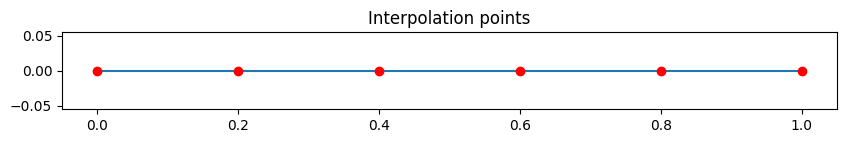

In [22]:
# define the interpolation points
n = 5 # degree of the polynomial
X = linspace(0,1,n+1)
figsize(10,1)
plot(x,0*x)
plot(X,0*X,'ro')
title('Interpolation points')


In [23]:
# build the basis

def basis(x,i,n): #v_i(x)
  """
  Monomial basis
  n is the order of the polynomial
  i in a number between 0 and n
  """
  return x**i

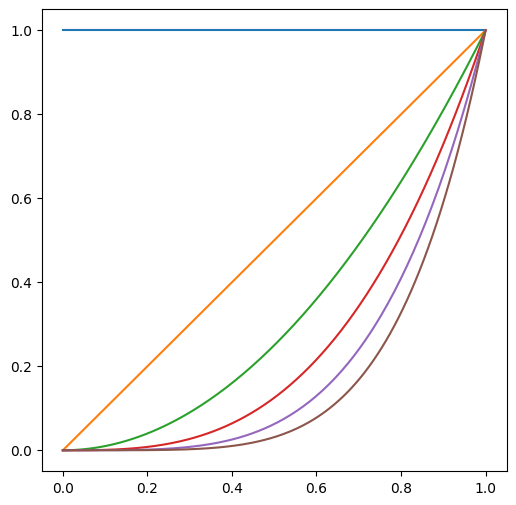

In [24]:
# visualize the monomial basis
figsize(6,6)
for i in range(n+1):
  plot(x,basis(x,i,n))

In [25]:
# build the Vandermonde matrix
V = zeros((n+1,n+1))
for i in range(n+1):
  for j in range(n+1):
    V[i,j] = basis(X[i],j,n)

# V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)]) #efficient

In [26]:
# evaluate your function on the interpolation points
u = my_function(X)

In [27]:
# solve the system Vp=u to find the coeffints p
p = solve(V, u)

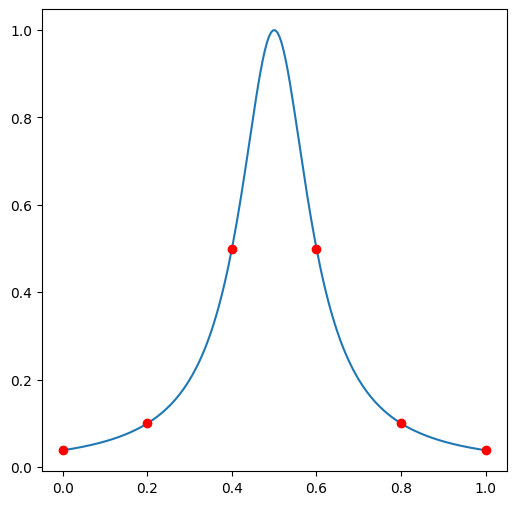

In [28]:
# plot function and interpolation points
plot(x,my_function(x))
plot(X,V.dot(p),'ro')

In [29]:
# build the matrix to visualize the polynomial
B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))])
B.shape

(200, 6)

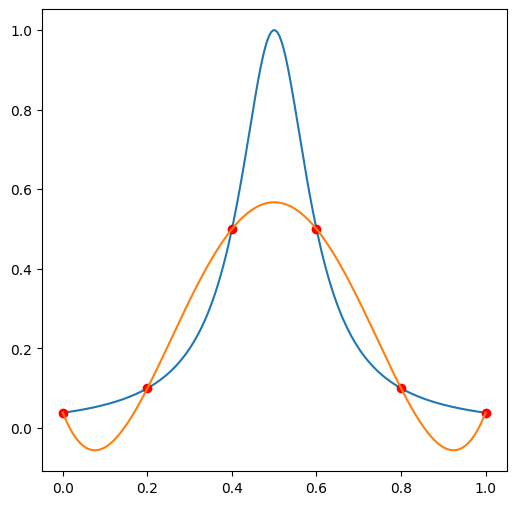

In [30]:
plot(x,my_function(x))
plot(X,V.dot(p),'ro')
plot(x,B.dot(p)) # plot the polynomial

In [31]:
error = np.max(abs(B.dot(p)-my_function(x)))
error

0.4321051132111742

In [32]:
cond(V) # condition number

4924.3710566111995

(200, 6)


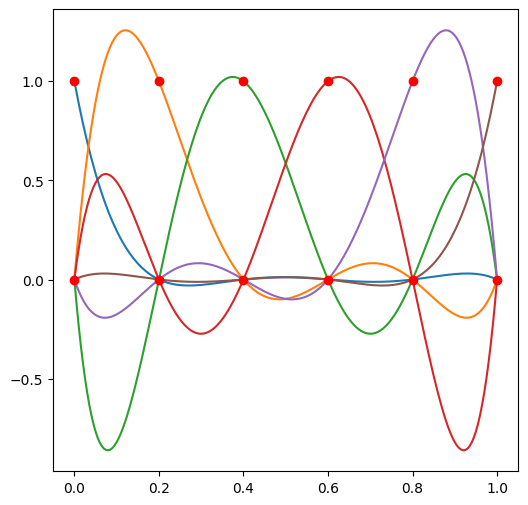

In [33]:
# compute the lagrange basis from the monomial basis and plot it
Vinv = inv(V)
Bl = B.dot(Vinv)
print(Bl.shape)
plot(x,Bl[:,:]) # plot(x,Bl[:,0]) # to plot only the first lagrange basis
plot(X,0*X,'ro')
plot(X,0*X+1,'ro')

In [34]:
# define a function for the interpolation
def interpolation(fun, X, x):
  n = len(X) - 1
  V = array([[basis(X[i],j,n) for j in range(n+1)] for i in range(n+1)])
  print("Condition number of V: ", cond(V))
  B = array([[basis(x[i],j,n) for j in range(n+1)] for i in range(len(x))])
  p = solve(V, fun(X))
  return B.dot(p), p, B, V


Condition number of V:  4924.3710566111995


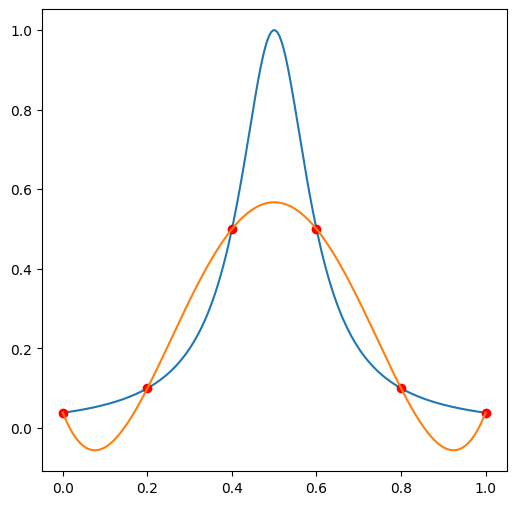

In [35]:
# check the results
plot(x, my_function(x))
plot(X, my_function(X),'ro')
plot(x, interpolation(my_function,X,x)[0])

Condition number of V:  98.86773850722771
Condition number of V:  98.86773850722771
Condition number of V:  686.4349418185955
Condition number of V:  686.4349418185955
Condition number of V:  4924.3710566111995
Condition number of V:  4924.3710566111995
Condition number of V:  36061.16088021232
Condition number of V:  36061.16088021232
Condition number of V:  267816.7009077296
Condition number of V:  267816.7009077296
Condition number of V:  2009396.3800388556
Condition number of V:  2009396.3800388556
Condition number of V:  15193229.67628169
Condition number of V:  15193229.67628169
Condition number of V:  115575244.55779406
Condition number of V:  115575244.55779406
Condition number of V:  883478686.4514534
Condition number of V:  883478686.4514534
Condition number of V:  6780588494.9134035
Condition number of V:  6780588494.9134035
Condition number of V:  52214927445.877914
Condition number of V:  52214927445.877914
Condition number of V:  403234907001.93036
Condition number of V: 

Text(0, 0.5, 'Error')

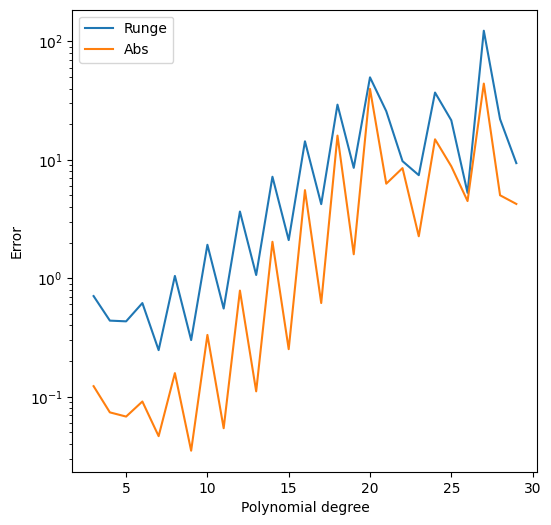

In [36]:
# see the error of the interpolation as the degree of the polynomial increase
error = []
error1 = []
N = range(3,30)
for n in N:
  X = linspace(0,1,n+1)
  error.append(np.max(abs(interpolation(my_function,X,x)[0]-my_function(x))))
  error1.append(np.max(abs(interpolation(my_function1,X,x)[0]-my_function1(x))))
plot(N,error,label='Runge')
plot(N,error1,label='Abs')
yscale('log') #better for error plot
legend()
xlabel('Polynomial degree')
ylabel('Error')